# Combining Python and R

The [rpy2][rpy2] library allows Python to interface directly with R by passing Python objects into R functions and converting the R output back into Python objects.

[rpy2]: https://rpy2.bitbucket.io/

In [1]:
%load_ext rpy2.ipython

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from sklearn import datasets

boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

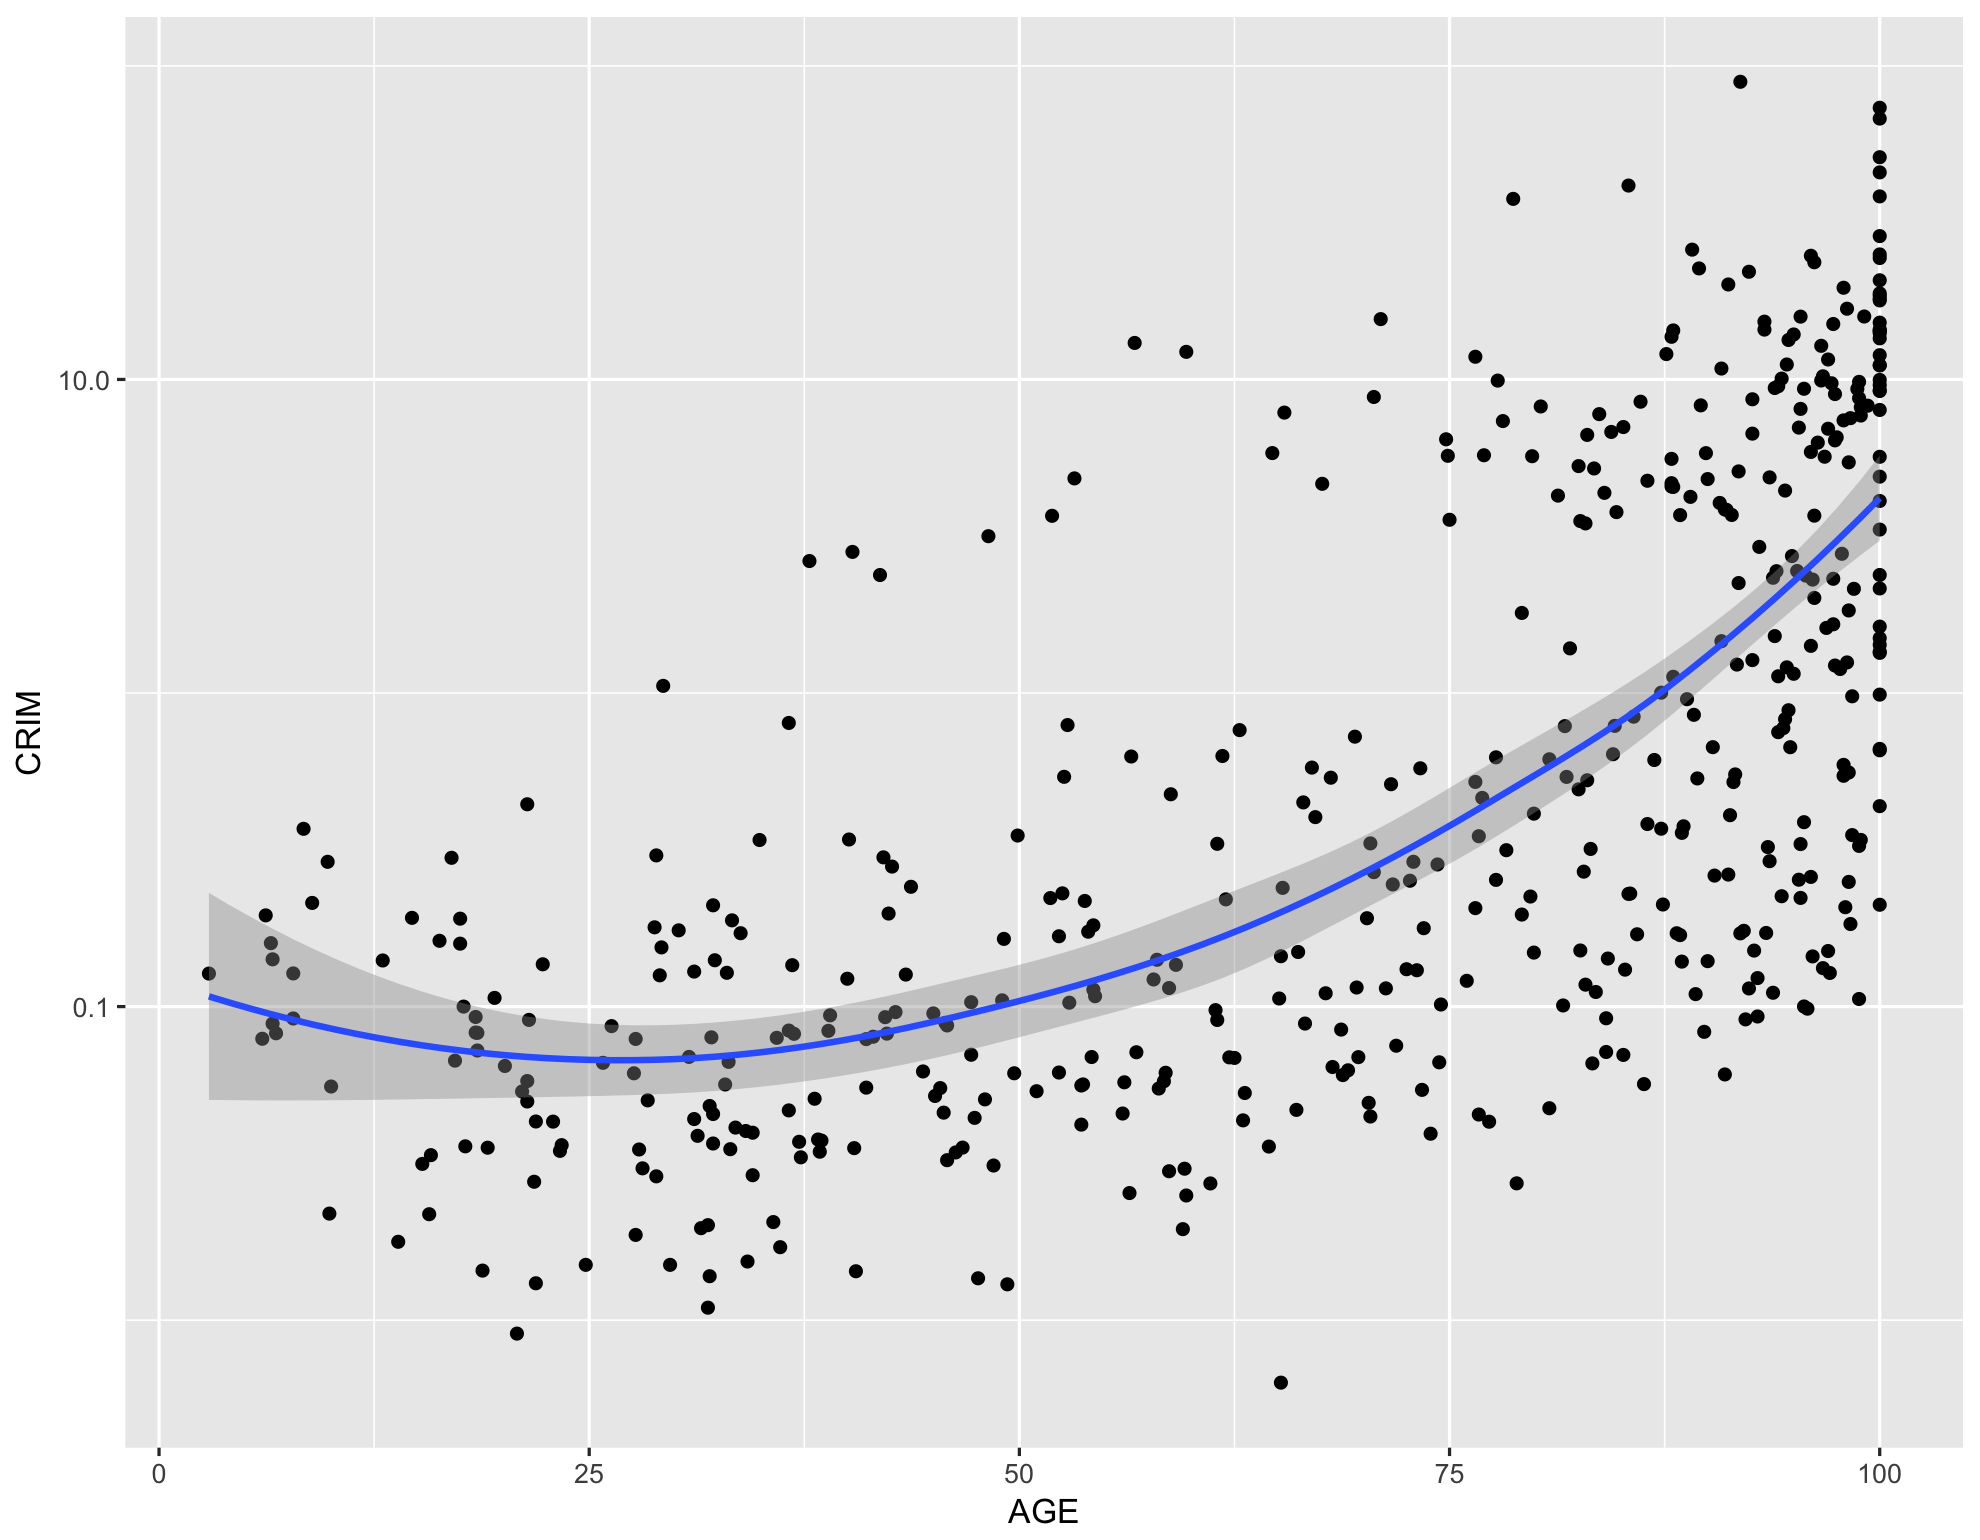

In [4]:
%%R -i df -w 9 -h 7 -u in -r 220

library(ggplot2)

ggplot(df, aes(x = AGE, y = CRIM)) + 
    geom_point() +
    geom_smooth() +
    scale_y_log10('CRIM')

In [17]:
%%R -i df -o model

model <- lm(log(CRIM) ~ AGE, df)
summary(model)


Call:
lm(formula = log(CRIM) ~ AGE, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1081 -1.2507 -0.1752  1.3473  4.0992 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.240707   0.190708  -22.24   <2e-16 ***
AGE          0.050380   0.002573   19.58   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.628 on 504 degrees of freedom
Multiple R-squared:  0.432,	Adjusted R-squared:  0.4309 
F-statistic: 383.4 on 1 and 504 DF,  p-value: < 2.2e-16



In [16]:
model

R object with classes: ('lm',) mapped to:
<ListVector - Python:0x1189ab348 / R:0x7fde5c3330b0>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]
  coefficients: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x11a483c88 / R:0x7fde5c3638e0>
[-4.240707, 0.050380]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x119f8b988 / R:0x7fde5c4f9e00>
[-4.108107, -3.334780, -2.438748, -1.497222, ..., -2.718552, -3.144699, -2.469239, -2.878921]
  effects: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x119f8bdc8 / R:0x7fde5c4fae00>
[17.678417, -31.868742, -2.299920, -1.433579, ..., -2.503064, -2.858940, -2.191834, -2.643286]
  rank: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x119f8b708 / R:0x7fde5cf14d98>
[2]
...
R object with classes: ('lm',) mapped to:
<ListVector - Python:0x1189ab348 / R:0x7fde5c3330b0>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]
  qr: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('lm',) mapped to:
<Vector - Python:0x119f88308 / R:0x7fde5d09aa30>
[RObject, Vector, RObject]
  df.residual: <class 'rpy2.robjects.Formula'>
  R object with classes: ('terms', 'formula') mapped to:
<Formula - Python:0x119f88608 / R:0x7fde5a6aaf40>
R object with classes: ('lm',) mapped to:
<ListVector - Python:0x1189ab348 / R:0x7fde5c3330b0>
[FloatVector, FloatVector, FloatVector, IntVector, ..., ListVector, Vector, Formula, DataFrame]